# Maxwell Dataset - Effort Estimation

@author: bharatnilam

Effort Estimation: Maxwell Data set. Yanfu Li. (2009). Zenodo. http://doi.org/10.5281/zenodo.268461

The goal of the project is to develop an effective effort estimation model achieving best possible accuracy level, optimizing software projects by estimating efforts for the same using machine learning techniques.

## Contents
- Import Libraries
- Data Description
- Data Cleaning
- EDA
- Feature Engineering
- Feature Selection
- Modeling and Evaluation

In [260]:
from scipy.io import arff
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.feature_selection import mutual_info_regression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

In [261]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import SGDRegressor

In [262]:
mw_data = arff.loadarff('maxwell.arff')
mw = pd.DataFrame(mw_data[0])
mw.to_csv('maxwell.csv', index=False)
mw = pd.read_csv('maxwell.csv')

In [263]:
mw.shape

(62, 27)

## Data Description

In [264]:
mw.head()

,Syear,App,Har,Dba,Ifc,Source,Telonuse,Nlan,T01,T02,...,T10,T11,T12,T13,T14,T15,Duration,Size,Time,Effort
0,92.0,2.0,2.0,1.0,2.0,2.0,0.0,3.0,4.0,3.0,...,5.0,4.0,4.0,4.0,4.0,5.0,16.0,647.0,8.0,7871.0
1,93.0,2.0,2.0,1.0,2.0,2.0,0.0,3.0,2.0,3.0,...,3.0,4.0,4.0,4.0,4.0,4.0,5.0,130.0,9.0,845.0
2,90.0,1.0,2.0,1.0,2.0,2.0,0.0,2.0,3.0,3.0,...,5.0,4.0,3.0,2.0,3.0,3.0,8.0,254.0,6.0,2330.0
3,86.0,3.0,2.0,1.0,2.0,2.0,0.0,3.0,2.0,2.0,...,4.0,5.0,4.0,3.0,2.0,3.0,16.0,1056.0,2.0,21272.0
4,88.0,2.0,2.0,1.0,2.0,2.0,0.0,2.0,3.0,3.0,...,4.0,3.0,4.0,5.0,4.0,4.0,12.0,383.0,4.0,4224.0


In [265]:
mw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 27 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Syear     62 non-null     float64
 1   App       62 non-null     float64
 2   Har       62 non-null     float64
 3   Dba       62 non-null     float64
 4   Ifc       62 non-null     float64
 5   Source    62 non-null     float64
 6   Telonuse  62 non-null     float64
 7   Nlan      62 non-null     float64
 8   T01       62 non-null     float64
 9   T02       62 non-null     float64
 10  T03       62 non-null     float64
 11  T04       62 non-null     float64
 12  T05       62 non-null     float64
 13  T06       62 non-null     float64
 14  T07       62 non-null     float64
 15  T08       62 non-null     float64
 16  T09       62 non-null     float64
 17  T10       62 non-null     float64
 18  T11       62 non-null     float64
 19  T12       62 non-null     float64
 20  T13       62 non-null     float64


In [266]:
mw.columns

Index(['Syear', 'App', 'Har', 'Dba', 'Ifc', 'Source', 'Telonuse', 'Nlan',
       'T01', 'T02', 'T03', 'T04', 'T05', 'T06', 'T07', 'T08', 'T09', 'T10',
       'T11', 'T12', 'T13', 'T14', 'T15', 'Duration', 'Size', 'Time',
       'Effort'],
      dtype='object')

In [267]:
mw.describe()

,Syear,App,Har,Dba,Ifc,Source,Telonuse,Nlan,T01,T02,...,T10,T11,T12,T13,T14,T15,Duration,Size,Time,Effort
count,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,...,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000
mean,89.580645,2.354839,2.612903,1.032258,1.935484,1.870968,0.241935,2.548387,3.048387,3.048387,...,3.612903,3.419355,3.822581,3.064516,3.258065,3.338710,17.209677,673.306452,5.580645,8223.209677
std,2.131331,0.993368,0.997617,0.442339,0.247676,0.337972,0.431751,1.019119,0.998809,0.711208,...,0.893599,0.984276,0.690075,0.955930,1.007114,0.745336,10.651156,784.084505,2.131331,10499.903168
min,85.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,...,2.000000,2.000000,2.000000,1.000000,1.000000,1.000000,4.000000,48.000000,1.000000,583.000000
25%,88.000000,2.000000,2.000000,1.000000,2.000000,2.000000,0.000000,2.000000,2.000000,3.000000,...,3.000000,3.000000,4.000000,2.000000,3.000000,3.000000,10.000000,232.500000,4.000000,2388.750000
50%,90.000000,2.000000,2.000000,1.000000,2.000000,2.000000,0.000000,3.000000,3.000000,3.000000,...,4.000000,3.000000,4.000000,3.000000,3.000000,3.000000,13.500000,385.000000,6.000000,5189.500000
75%,91.000000,3.000000,3.000000,1.000000,2.000000,2.000000,0.000000,3.000000,4.000000,3.000000,...,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,23.500000,640.750000,7.000000,9308.000000
max,93.000000,5.000000,5.000000,4.000000,2.000000,2.000000,1.000000,4.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,54.000000,3643.000000,9.000000,63694.000000


## EDA

In [268]:
mw.corr()

,Syear,App,Har,Dba,Ifc,Source,Telonuse,Nlan,T01,T02,...,T10,T11,T12,T13,T14,T15,Duration,Size,Time,Effort
Syear,1.000000,-0.160855,0.130573,-0.054970,-0.145259,-0.053592,0.450547,0.334031,0.117500,-0.051284,...,0.119950,0.225865,0.115776,-0.187659,0.318550,0.235356,-0.412739,0.017363,1.000000,-0.197499
App,-0.160855,1.000000,0.025080,-0.213018,0.227835,0.040953,-0.012330,0.015149,-0.331517,0.091319,...,-0.322890,-0.020553,-0.074058,-0.041767,0.087218,-0.032141,0.147793,0.056581,-0.160855,0.044230
Har,0.130573,0.025080,1.000000,0.288806,-0.235426,-0.588159,-0.083487,0.034849,0.298793,-0.065589,...,-0.097285,-0.049008,-0.172835,-0.059334,0.247906,-0.019202,0.060219,0.058396,0.130573,-0.060339
Dba,-0.054970,-0.213018,0.288806,1.000000,0.019308,-0.081358,-0.041535,0.032846,0.219039,-0.109262,...,0.032109,-0.182191,-0.034649,0.188844,0.128203,0.065764,0.102926,-0.005985,-0.054970,-0.012853
Ifc,-0.145259,0.227835,-0.235426,0.019308,1.000000,0.486446,0.148359,-0.117324,-0.185978,0.297210,...,-0.188760,-0.021692,-0.355817,-0.120613,-0.195045,-0.412511,0.228926,-0.091403,-0.145259,0.074087
Source,-0.053592,0.040953,-0.588159,-0.081358,0.486446,1.000000,0.217443,-0.029171,-0.418269,0.231004,...,-0.005253,0.214607,0.040813,0.127672,-0.093218,-0.214129,-0.087995,-0.121408,-0.053592,0.030936
Telonuse,0.450547,-0.012330,-0.083487,-0.041535,0.148359,0.217443,1.000000,0.438675,-0.065606,-0.198912,...,-0.008224,0.374562,0.146431,-0.117879,-0.145941,0.148721,0.035131,0.151446,0.450547,0.070786
Nlan,0.334031,0.015149,0.034849,0.032846,-0.117324,-0.029171,0.438675,1.000000,0.118450,-0.172916,...,0.290923,0.567783,0.350407,0.080880,0.195274,0.377338,0.067766,0.386770,0.334031,0.274311
T01,0.117500,-0.331517,0.298793,0.219039,-0.185978,-0.418269,-0.065606,0.118450,1.000000,-0.095660,...,0.223370,0.012372,0.012659,0.048186,-0.142993,0.241875,0.219388,0.252199,0.117500,0.208369
T02,-0.051284,0.091319,-0.065589,-0.109262,0.297210,0.231004,-0.198912,-0.172916,-0.095660,1.000000,...,0.004160,-0.216809,-0.115831,-0.004667,0.096717,-0.124202,-0.124715,-0.057676,-0.051284,-0.100439


<AxesSubplot:title={'center':'Pearson Correlation of Features'}>

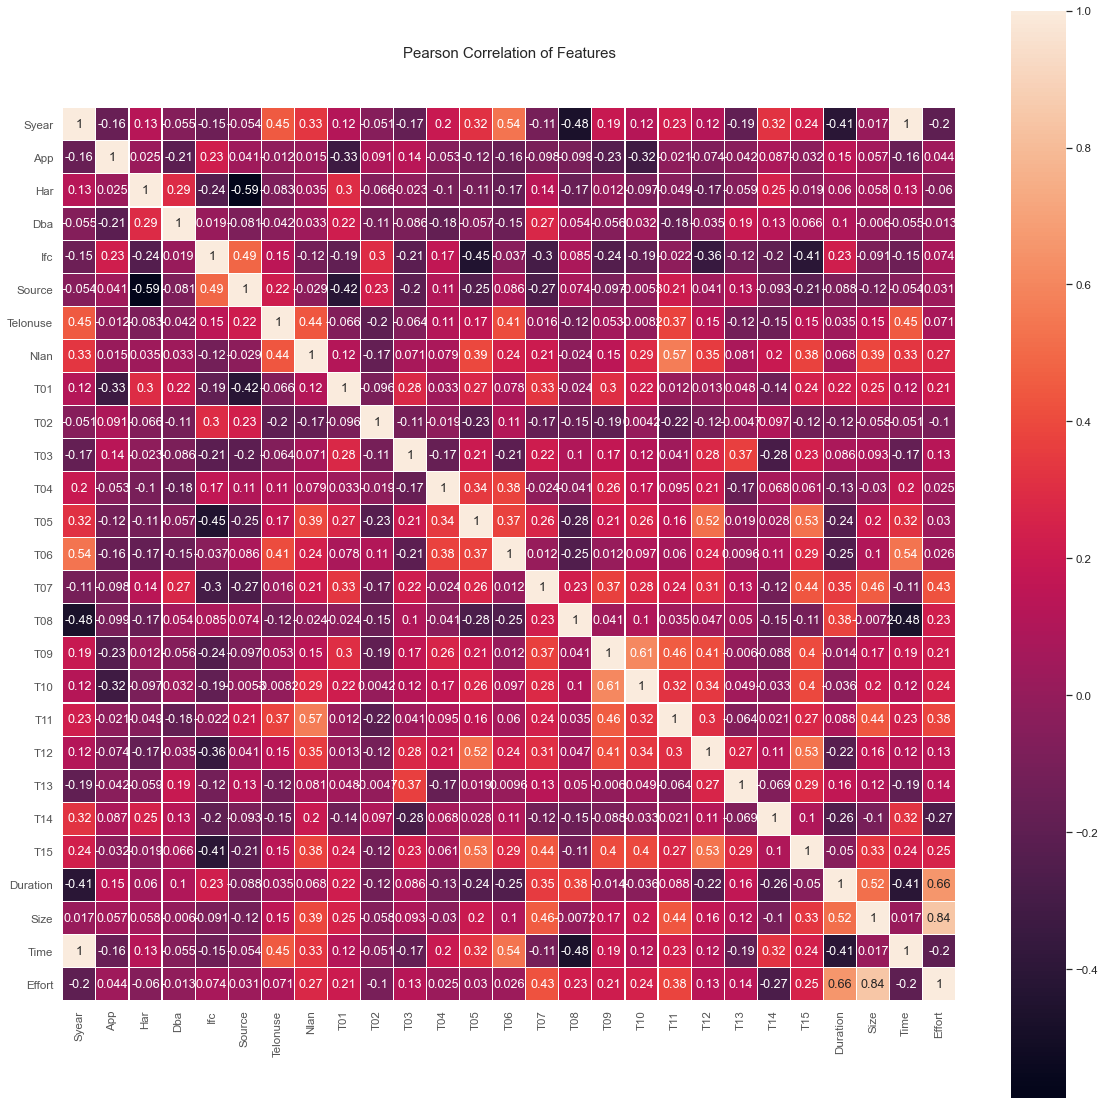

In [269]:
plt.figure(figsize=(20,20))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.set(font_scale=1.05)
sns.heatmap(mw.astype(float).corr(),linewidths=0.1,vmax=1.0, square=True, linecolor='white', annot=True)

### Feature Engineering

#### Robust Scaler

In [316]:
scaler = RobustScaler()
minmax = MinMaxScaler()

In [317]:
X = mw.drop(['Effort'], axis=1)
y = mw['Effort']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [318]:
X_train_sc = scaler.fit_transform(X_train)
X_test_sc = scaler.fit_transform(X_test)

## Feature Selection

In [319]:
lasso = Lasso(max_iter=2000)
lasso.fit(X_train_sc, y_train)

Lasso(max_iter=2000)

In [320]:
FI_lasso = pd.DataFrame({"Feature Importance":lasso.coef_}, index=X.columns)

In [321]:
FI_lasso.sort_values("Feature Importance",ascending=False)

,Feature Importance
Ifc,8.318882e+03
Source,6.242151e+03
T03,4.657695e+03
T06,3.580044e+03
Size,3.554044e+03
Duration,3.028853e+03
Har,2.170139e+03
T09,2.109020e+03
Nlan,8.934387e+02
T10,8.242981e+02


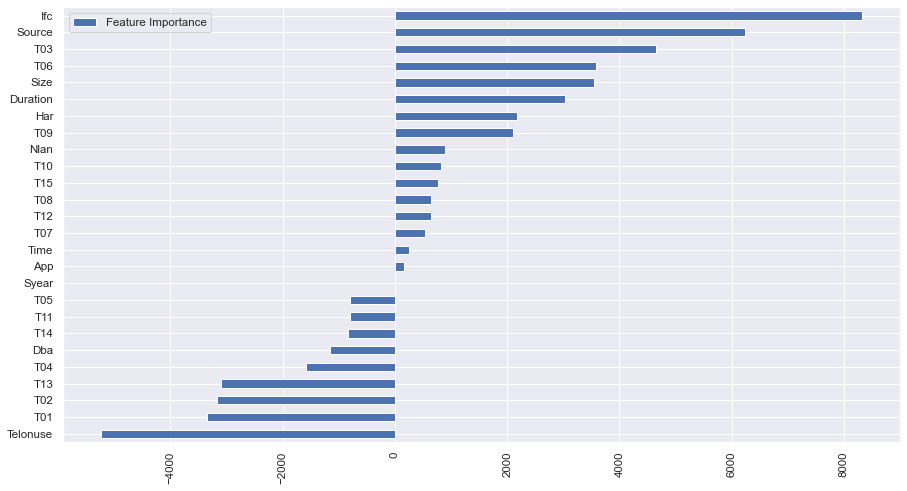

In [322]:
FI_lasso[FI_lasso["Feature Importance"]!=0].sort_values("Feature Importance").plot(kind="barh",figsize=(15,8))
plt.xticks(rotation=90)
plt.show()

#### Mutual Info Regression

In [323]:
Xm = mw.drop(['Effort'], axis=1)
ym = mw['Effort']

mutual_info = mutual_info_regression(Xm, ym)
mutual_info = pd.Series(mutual_info)
mutual_info.index = Xm.columns
mutual_info.sort_values(ascending=False)

Size        0.446340
Duration    0.386261
T07         0.159970
T09         0.081349
T11         0.079351
T02         0.036741
T08         0.036727
App         0.036530
Nlan        0.033908
Dba         0.018025
Source      0.017350
T15         0.010933
T14         0.010896
T10         0.010704
Ifc         0.009713
T12         0.007634
T05         0.006821
Telonuse    0.000000
Har         0.000000
Time        0.000000
T01         0.000000
T03         0.000000
T04         0.000000
T06         0.000000
T13         0.000000
Syear       0.000000
dtype: float64

<AxesSubplot:>

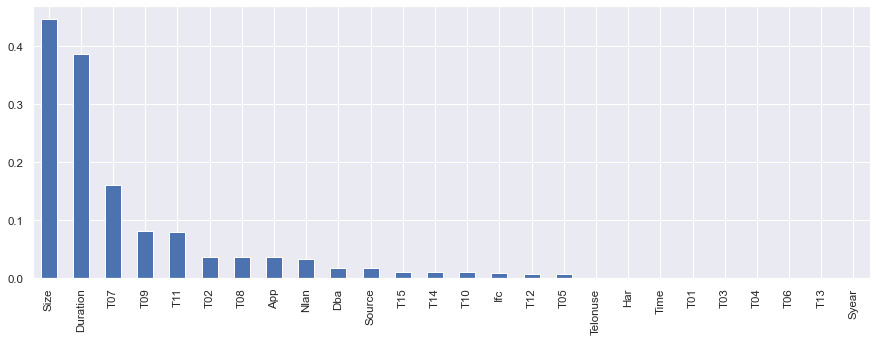

In [324]:
mutual_info.sort_values(ascending=False).plot.bar(figsize=(15,5))

In [325]:
from sklearn.feature_selection import SelectPercentile
selected_top_columns = SelectPercentile(mutual_info_regression, percentile=30)
selected_top_columns.fit(Xm, ym)
Xm.columns[selected_top_columns.get_support()]

Index(['App', 'T02', 'T07', 'T08', 'T09', 'T11', 'Duration', 'Size'], dtype='object')

In [349]:
features = ['App', 'T07', 'T08', 'T09', 'T11', 'Duration', 'Size', 'Ifc', 'Source', 'T03', 'T06']

## Modeling and Evaluation

In [331]:
X = mw[features]
y = mw['Effort']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [332]:
X_train_sc = scaler.fit_transform(X_train)
X_test_sc = scaler.fit_transform(X_test)

In [346]:
def model_score(model, name):
    estimator = model
    estimator.fit(X_train_sc, y_train)
    estimator_prediction = estimator.predict(X_test_sc)
    pred_score = (metrics.mean_absolute_error(y_test, estimator_prediction), np.sqrt(metrics.mean_squared_error(y_test, estimator_prediction)), metrics.r2_score(y_test, estimator_prediction)) 
    print('{} Predictions: MAE: {:.6f}, RMSE: {:.6f}, R2_Score: {:.4f}'.format(name, pred_score[0], pred_score[1], pred_score[2]))

In [347]:
models = [LinearRegression(), Lasso(max_iter=5000), Ridge(), ElasticNet(), SGDRegressor(), SVR(), KNeighborsRegressor(), DecisionTreeRegressor(), GradientBoostingRegressor(), RandomForestRegressor(), ExtraTreesRegressor(), MLPRegressor(hidden_layer_sizes=(6,6), max_iter=5000)]

In [348]:
names = ['LR', 'LasR', 'RR', 'EN', 'SGD', 'SVR', 'KN', 'DT', 'GB', 'RF', 'ET', 'MLP']
for name, model in zip(names, models):
    model_score(model, name)

LR Predictions: MAE: 5384.168942, RMSE: 9169.305572, R2_Score: 0.6860
LasR Predictions: MAE: 5380.077942, RMSE: 9167.935700, R2_Score: 0.6861
RR Predictions: MAE: 5335.302091, RMSE: 9246.265611, R2_Score: 0.6807
EN Predictions: MAE: 5631.095187, RMSE: 10467.606919, R2_Score: 0.5907
SGD Predictions: MAE: 5356.911774, RMSE: 9266.347395, R2_Score: 0.6793
SVR Predictions: MAE: 8697.122635, RMSE: 17539.493868, R2_Score: -0.1491
KN Predictions: MAE: 5356.553846, RMSE: 11797.202519, R2_Score: 0.4802
DT Predictions: MAE: 5421.000000, RMSE: 9595.096083, R2_Score: 0.6561
GB Predictions: MAE: 6068.232913, RMSE: 11509.111055, R2_Score: 0.5052
RF Predictions: MAE: 5404.187692, RMSE: 10475.170555, R2_Score: 0.5901
ET Predictions: MAE: 5988.636923, RMSE: 12506.217074, R2_Score: 0.4158
MLP Predictions: MAE: 6272.429428, RMSE: 11322.901422, R2_Score: 0.5211


C:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5000) reached and the optimization hasn't converged yet.
  warnings.warn(


### Hyperparameter tuning using GridSearchCV

In [350]:
def grid(model, param_grid):
    grid = GridSearchCV(model, param_grid, verbose=3, n_jobs=-1)
    grid.fit(X_train_sc, y_train)
    print('Best Parameters: {}'.format(grid.best_params_))
    print('Best Estimator: {}'.format(grid.best_estimator_))
    grid_predictions = grid.predict(X_test_sc)
    pred_score = (metrics.mean_absolute_error(y_test, grid_predictions), np.sqrt(metrics.mean_squared_error(y_test, grid_predictions)), metrics.r2_score(y_test, grid_predictions)) 
    print('Predictions: MAE: {:.6f}, RMSE: {:.6f}, R2_Score: {:.4f}'.format(pred_score[0], pred_score[1], pred_score[2]))
    
    fig = plt.figure(figsize=(12, 6))
    plt.scatter(y_test, grid_predictions)
    plt.xlabel('Effort') 
    plt.ylabel('Predictions') 
    plt.grid()
    plt.show()

lasso
ridge
dt
gb
rf
mlp


### Lasso Tuning